<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Chapter 3

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [8]:
# data prep
def ecdf(data):
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

rain_june = np.array([  66.2,   39.7,   76.4,   26.5,   11.2,   61.8,    6.1,   48.4,
         89.2,  104. ,   34. ,   60.6,   57.1,   79.1,   90.9,   32.3,
         63.8,   78.2,   27.5,   43.4,   30.1,   17.3,   77.5,   44.9,
         92.2,   39.6,   79.4,   66.1,   53.5,   98.5,   20.8,   55.5,
         39.6,   56. ,   65.1,   14.8,   13.2,   88.1,    8.4,   32.1,
         19.6,   40.4,    2.2,   77.5,  105.4,   77.2,   38. ,   27.1,
        111.8,   17.2,   26.7,   23.3,   77.2,   87.2,   27.7,   50.6,
         60.3,   15.1,    6. ,   29.4,   39.3,   56.3,   80.4,   85.3,
         68.4,   72.5,   13.3,   28.4,   14.7,   37.4,   49.5,   57.2,
         85.9,   82.1,   31.8,  126.6,   30.7,   41.4,   33.9,   13.5,
         99.1,   70.2,   91.8,   61.3,   13.7,   54.9,   62.5,   24.2,
         69.4,   83.1,   44. ,   48.5,   11.9,   16.6,   66.4,   90. ,
         34.9,  132.8,   33.4,  225. ,    7.6,   40.9,   76.5,   48. ,
        140. ,   55.9,   54.1,   46.4,   68.6,   52.2,  108.3,   14.6,
         11.3,   29.8,  130.9,  152.4,   61. ,   46.6,   43.9,   30.9,
        111.1,   68.5,   42.2,    9.8,  285.6,   56.7,  168.2,   41.2,
         47.8,  166.6,   37.8,   45.4,   43.2])

rain_november = np.array([  83.6,   30.9,   62.2,   37. ,   41. ,  160.2,   18.2,  122.4,
         71.3,   44.2,   49.1,   37.6,  114.5,   28.8,   82.5,   71.9,
         50.7,   67.7,  112. ,   63.6,   42.8,   57.2,   99.1,   86.4,
         84.4,   38.1,   17.7,  102.2,  101.3,   58. ,   82. ,  101.4,
         81.4,  100.1,   54.6,   39.6,   57.5,   29.2,   48.8,   37.3,
        115.4,   55.6,   62. ,   95. ,   84.2,  118.1,  153.2,   83.4,
        104.7,   59. ,   46.4,   50. ,  147.6,   76.8,   59.9,  101.8,
        136.6,  173. ,   92.5,   37. ,   59.8,  142.1,    9.9,  158.2,
         72.6,   28. ,  112.9,  119.3,  199.2,   50.7,   44. ,  170.7,
         67.2,   21.4,   61.3,   15.6,  106. ,  116.2,   42.3,   38.5,
        132.5,   40.8,  147.5,   93.9,   71.4,   87.3,  163.7,  141.4,
         62.6,   84.9,   28.8,  121.1,   28.6,   32.4,  112. ,   50. ,
         96.9,   81.8,   70.4,  117.5,   41.2,  124.9,   78.2,   93. ,
         53.5,   50.5,   42.6,   47.9,   73.1,  129.1,   56.9,  103.3,
         60.5,  134.3,   93.1,   49.5,   48.2,  167.9,   27. ,  111.1,
         55.4,   36.2,   57.4,   66.8,   58.3,   60. ,  161.6,  112.7,
         37.4,  110.6,   56.6,   95.8,  126.8])

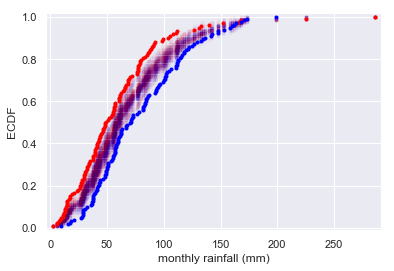

In [9]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

In [30]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [31]:
def mean_diff(data1,data2):
    return np.mean(data1) - np.mean(data2)

draw_perm_reps(rain_june, rain_november, mean_diff, 1000)

array([ 8.16691729e+00, -4.91428571e+00, -2.40601504e+00,  3.76842105e+00,
       -6.84962406e+00, -3.62406015e+00,  6.77443609e+00,  3.67067669e+00,
       -6.42556391e+00, -4.76691729e-01,  3.14887218e+00,  8.76992481e+00,
       -4.90977444e+00, -1.15639098e+00,  3.23909774e+00,  3.94586466e+00,
       -7.95338346e+00,  2.75187970e-01, -6.33383459e+00, -9.86466165e+00,
        6.01503759e-03,  1.86766917e+00, -1.06315789e+00,  5.65563910e+00,
        5.17443609e+00,  4.36240602e+00,  9.67368421e+00,  2.32481203e+00,
        6.88721805e+00, -7.27819549e-01,  1.53082707e+00, -5.95338346e+00,
       -1.13082707e+00, -1.24661654e+00, -8.21203008e+00, -6.75187970e-01,
        6.47669173e+00, -1.07428571e+01, -4.07218045e+00, -4.40751880e+00,
        3.28721805e+00, -2.64962406e+00,  1.22255639e+00,  1.86917293e+00,
       -6.78496241e+00,  7.96992481e-02, -1.73233083e+00,  4.75789474e+00,
        6.24360902e+00, -2.83458647e+00,  2.74586466e+00, -1.93684211e+00,
       -5.86315789e+00, -

In [85]:
# data prep
from io import StringIO
df_str = ',ID,impact_force\n20,A,1.612\n21,A,0.605\n22,A,0.327\n23,A,0.946\n24,A,0.541\n25,A,1.539\n26,A,0.529\n27,A,0.628\n28,A,1.453\n29,A,0.297\n30,A,0.703\n31,A,0.269\n32,A,0.751\n33,A,0.245\n34,A,1.182\n35,A,0.515\n36,A,0.435\n37,A,0.383\n38,A,0.457\n39,A,0.73\n60,B,0.172\n61,B,0.142\n62,B,0.037\n63,B,0.453\n64,B,0.355\n65,B,0.022\n66,B,0.502\n67,B,0.273\n68,B,0.72\n69,B,0.582\n70,B,0.198\n71,B,0.198\n72,B,0.597\n73,B,0.516\n74,B,0.815\n75,B,0.402\n76,B,0.605\n77,B,0.711\n78,B,0.614\n79,B,0.468\n'
str_io = StringIO(df_str)
df = pd.read_csv(str_io, index_col=0)
df.info()

force_a = df.loc[df['ID']=='A', 'impact_force'].values
force_b = df.loc[df['ID']=='B', 'impact_force'].values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 20 to 79
Data columns (total 2 columns):
ID              40 non-null object
impact_force    40 non-null float64
dtypes: float64(1), object(1)
memory usage: 960.0+ bytes


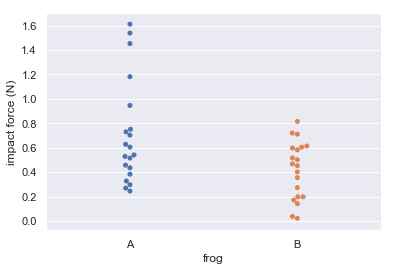

In [86]:
# Make bee swarm plot
_ = sns.swarmplot('ID', 'impact_force', data=df)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()


In [87]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0054


In [88]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [89]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b + 0.55 - np.mean(force_b)

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)


p =  0.0054


In [135]:
# data prep
forces_concat = np.concatenate((force_a, force_b))
empirical_diff_means = np.mean(force_a) - np.mean(force_b)

# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force 

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates > empirical_diff_means) / 10000
print('p-value =', p)

p-value = 0.0052


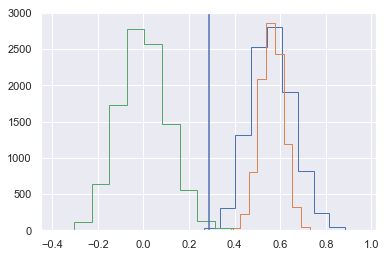

In [137]:
plt.hist(bs_replicates_a, histtype='step')
plt.hist(bs_replicates_b, histtype='step')
plt.hist(bs_replicates, histtype='step')
plt.axvline(empirical_diff_means)
plt.show()